In [ ]:
#|default_exp sailboat_sails_classification

# Predict Hoisted Sailboat Sails

In [ ]:
#|export
from fastai.vision.all import PILImage, load_learner
import gradio as gr
from pathlib import Path

im_path = Path('../sailboat_photos')
model_path = Path('../models')

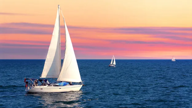

In [ ]:
im = PILImage.create(im_path/'sailboat1.png')
im.thumbnail((192, 192))
im

In [ ]:
#|export
learn = load_learner(model_path/'sailboat_sails_classification.pkl')

In [ ]:
%time learn.predict(im)

CPU times: total: 578 ms
Wall time: 269 ms


((#2) ['Jib','Main'],
 TensorBase([ True,  True, False]),
 TensorBase([0.9997, 0.9934, 0.0255]))

In [ ]:
#|export
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(learn.dls.vocab, map(float, probs)))

In [ ]:
classify_image(im)

{'Jib': 0.9997250437736511,
 'Main': 0.9934378266334534,
 'Spinnaker': 0.02551761083304882}

In [ ]:
!dir

 Volume in drive C is ZOOM
 Volume Serial Number is 92EC-2B45

 Directory of C:\Users\Stephen\Code\fastbook_exercises\nbs

2022-12-03  10:22 PM    <DIR>          .
2022-12-03  10:22 PM    <DIR>          ..
2022-12-03  10:20 PM    <DIR>          .ipynb_checkpoints
2022-09-05  11:31 AM               978 00_core.ipynb
2022-11-12  06:37 PM             7,083 01_collab_example.ipynb
2022-11-13  11:05 PM        17,983,409 01_compare_image_sources.ipynb
2022-11-30  10:59 PM         3,374,300 01_sailboat_sails_classification.ipynb
2022-11-12  06:41 PM           227,649 01_segmentation_example.ipynb
2022-11-12  06:42 PM             6,488 01_tabular_example.ipynb
2022-11-12  09:45 PM            15,576 01_text_example.ipynb
2022-12-03  10:22 PM            62,830 02_app.ipynb
2022-12-03  10:21 PM    <DIR>          flagged
2022-11-30  11:46 PM             1,575 index.ipynb
2022-11-30  11:46 PM               280 nbdev.yml
2022-09-05  11:31 AM               600 styles.css
2022-11-30  11:46 PM         

In [ ]:
#|export
image = gr.Image(shape=(192, 192))
label = gr.Label(show_label=False)
# examples = [str(im_path/f'sailboat{i}.png') for i in range(1,5)]
examples = [f'sailboat{i}.png' for i in range(1,5)]
examples
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [ ]:
from nbdev import nbdev_export
nbdev_export('02_app.ipynb')